## ChEMBL Database
The ChEMBL Database is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 76,000 documents, 1.2 million assays and the data spans 13,000 targets and 1,800 cells and 33,000 indications. [Data as of March 25, 2020; ChEMBL version 26].

In [1]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


From the table above we see the last entry is the protein that corresponds to Covid-19, the virus SARS-Covid2 also known as Severe acute respiratory syndrome coronavirus 2. To get bioactivity data we make a request to the chembl object with the target_chembl_id "CHEMBL4523582"

Here, we will retrieve only bioactivity data for coronavirus 3C-like proteinase (CHEMBL3927) that are reported as IC$_{50}$ values in nM (nanomolar) unit.

In [3]:
target_chembl_id = 'CHEMBL4523582'
activity = new_client.activity
res = activity.filter(target_chembl_id=target_chembl_id).filter(standard_type="IC50")

In [19]:
df = pd.DataFrame(res)
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,Dtt Insensitive,19964199,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.39
1,Dtt Insensitive,19964200,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.21
2,Dtt Insensitive,19964201,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.08
3,Dtt Insensitive,19964202,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,1.58
4,Dtt Insensitive,19964203,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.04


Some columns are completely missing so they will be dropped while others are missing a few.

<AxesSubplot:>

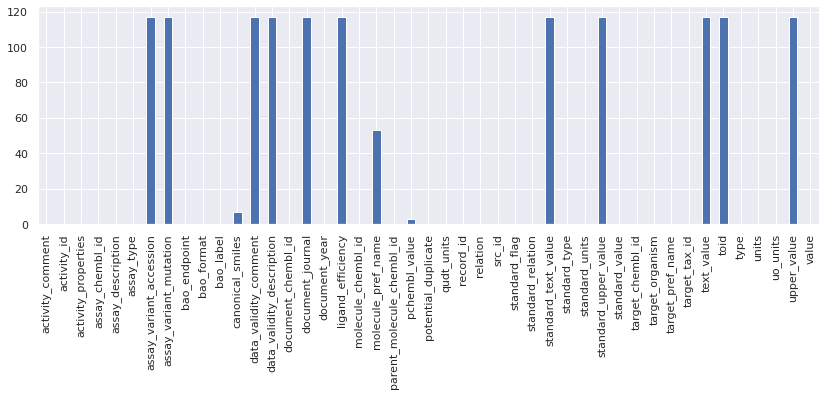

In [20]:
df.isna().sum().plot(kind='bar', figsize=(14, 4))

There are a lot of columns here but we will only look at a few. 
- SMILES - simplified molecular input line entry system, = double bond, () attached to an atom, C - Carbon
O - Oxygen
N - Nitrogen
- molecule_chembl_id - ID on chembl
- standard_value - The target value is the standard value which is the potency of the drug. 


The lower the standard value the better the potency of the drug. A drugs affectness is the IC50, the inhibitory concentration at 50%. Idealy we want small standard values so we get to 50% with a lower concertration. 

For example, if you had to choose to take 5mL of medication or 5L of medication to have the same affect which would you choose. Also economically smaller doeses are easier to distribute and make

Now we will feature engineer the bioactivity class based on the standard value. The compounds will be 

- active: Standard values having values of less than 1000 nM
- inactive: Standard values greater than 10,000 nM
- intermediate: Standard values between 1,000 and 10,000 nM will be referred to as intermediate.

In [21]:
df['standard_value'] = pd.to_numeric(df['standard_value'])
df['bioactivity_class'] = 'intermediate'
df.loc[df['standard_value'].astype(float) >= 10000, 'bioactivity_class'] = 'inactive'
df.loc[df['standard_value'].astype(float) <= 1000, 'bioactivity_class'] = 'active'

Now we will query for the columns we need and drop rows that have missing canonical_smiles for the next step

In [22]:
bioactivity_columns=['molecule_chembl_id', 'canonical_smiles', 'standard_value', 'bioactivity_class']
df = df[bioactivity_columns].dropna(subset=['canonical_smiles'])

In [23]:
df.isna().any()

molecule_chembl_id    False
canonical_smiles      False
standard_value        False
bioactivity_class     False
dtype: bool

In [24]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active


### Calculate Lipinski descriptors
With the chembl data cleaned we can now calculate Lipinski descriptors based on the canonical_smiles.

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule. The rule of five corresponds to how the four descriptors are all within a range that is a multiple of 5.

The Lipinski's Rule stated the following:

- Molecular weight < 500 Dalton
- Octanol-water partition coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

In [25]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

Using rdkit we can get the 4 descriptor, moldata will be a column of objects that we can then use to compute the decriptors

In [26]:
df['moldata'] = df['canonical_smiles'].map(Chem.MolFromSmiles)
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,moldata
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active,<rdkit.Chem.rdchem.Mol object at 0x7f20c70a7f80>
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active,<rdkit.Chem.rdchem.Mol object at 0x7f20c70a7990>
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active,<rdkit.Chem.rdchem.Mol object at 0x7f20c70a70d0>
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7f20c70a7df0>
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active,<rdkit.Chem.rdchem.Mol object at 0x7f20c70a7620>


In [27]:
df['molwt'] = df['moldata'].map(Descriptors.MolWt)
df['logP'] = df['moldata'].map(Descriptors.MolLogP)
df['numHDonors'] = df['moldata'].map(Descriptors.NumHDonors)
df['numHAcceptors'] = df['moldata'].map(Descriptors.NumHAcceptors)

Now that we have the descriptors we no longer need the moldata objects

In [28]:
lipinski_descriptors = ['molwt', 'logP', 'numHDonors', 'numHAcceptors']
df = df[lipinski_descriptors + ['bioactivity_class', 'standard_value', 'canonical_smiles']]
df.head()

,molwt,logP,numHDonors,numHAcceptors,bioactivity_class,standard_value,canonical_smiles
0,369.368,3.51522,1,4,active,390.0,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1
1,226.351,3.30451,0,5,active,210.0,Cc1c(-c2cnccn2)ssc1=S
2,334.400,3.26220,0,5,active,80.0,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1
3,458.375,2.23320,8,11,intermediate,1580.0,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...
4,237.052,2.22770,0,2,active,40.0,O=C1C=Cc2cc(Br)ccc2C1=O


### Calculate the molecular finger print

Another set of features we can collect is the finger print of the canonical_smiles using padelpy

In [29]:
from padelpy import from_smiles

In [30]:
pdf = df['canonical_smiles'].map(lambda x: from_smiles(x, fingerprints=True, descriptors=False))
pdf.head()

0    {'PubchemFP0': '1', 'PubchemFP1': '1', 'Pubche...
1    {'PubchemFP0': '1', 'PubchemFP1': '0', 'Pubche...
2    {'PubchemFP0': '1', 'PubchemFP1': '1', 'Pubche...
3    {'PubchemFP0': '1', 'PubchemFP1': '1', 'Pubche...
4    {'PubchemFP0': '1', 'PubchemFP1': '0', 'Pubche...
Name: canonical_smiles, dtype: object

The padel data frame is a series of list of dict, we convert the data into dataframe

In [31]:
padel_df = pd.DataFrame(pdf.tolist()).apply(pd.to_numeric)
padel_df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


There are 881 columns are the data is very sparse, we can drop columns that have very little variance

In [32]:
zero_cols = padel_df.sum().loc[lambda x: x<10]
ones_cols = padel_df.sum().loc[lambda x: x>100]
print(f'Columns that are mostly 0s: {zero_cols.shape[0]}')
print(f'Columns that are mostly 1s: {ones_cols.shape[0]}')

Columns that are mostly 0s: 580
Columns that are mostly 1s: 9


In [33]:
padel_df = padel_df.drop(zero_cols.index.tolist() + ones_cols.index.tolist(), axis=1)
padel_df.head()

,PubchemFP1,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,...,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,1,0,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,1,0,1,1,0,0,...,0,0,0,0,1,0,1,0,1,0
3,1,1,1,0,0,0,1,1,1,1,...,0,1,0,1,0,1,0,1,0,1
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0


We can now merge the padel_df and the bioactivity dataframe and drop column

In [34]:
df = df.merge(padel_df, left_index=True, right_index=True)
df.head()

,molwt,logP,numHDonors,numHAcceptors,bioactivity_class,standard_value,canonical_smiles,PubchemFP1,PubchemFP2,PubchemFP12,...,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,369.368,3.51522,1,4,active,390.0,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,226.351,3.30451,0,5,active,210.0,Cc1c(-c2cnccn2)ssc1=S,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,334.400,3.26220,0,5,active,80.0,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,1,0,1,...,0,0,0,0,1,0,1,0,1,0
3,458.375,2.23320,8,11,intermediate,1580.0,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1,1,1,...,0,1,0,1,0,1,0,1,0,1
4,237.052,2.22770,0,2,active,40.0,O=C1C=Cc2cc(Br)ccc2C1=O,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Exploratory Data Analysis

We begin with the distribution of the Bioactivity Class

<AxesSubplot:title={'center':'Bioactivity Class'}>

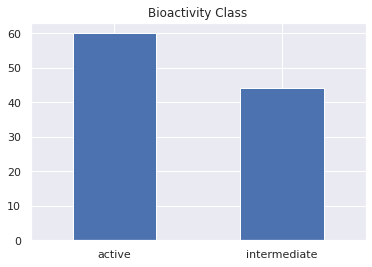

In [171]:
df['bioactivity_class'].value_counts().plot(kind='bar', title='Bioactivity Class', rot=0)

There is a good balance between active and intermediate compounds

<AxesSubplot:>

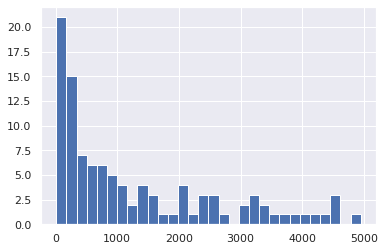

In [172]:
df['standard_value'].hist(bins=30)

The distribution of the standard value is right scewed

<AxesSubplot:xlabel='molwt', ylabel='logP'>

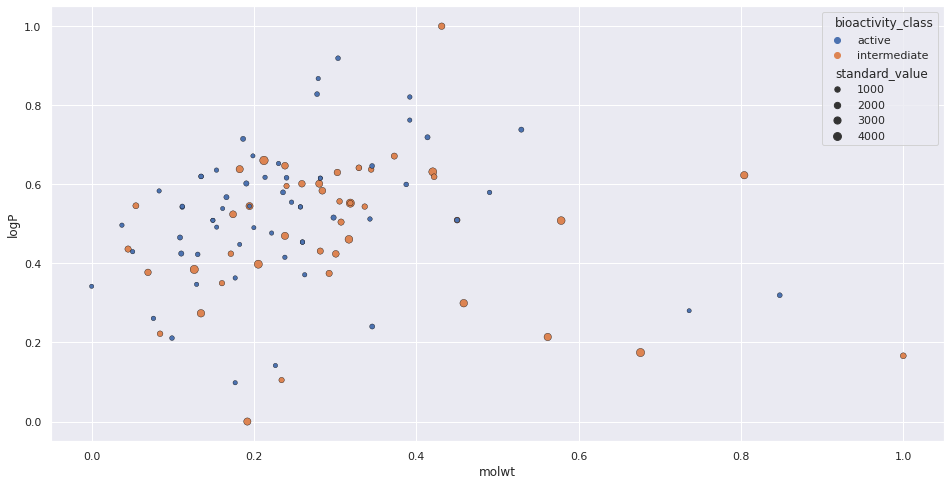

In [173]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='molwt', y='logP', data=df, hue='bioactivity_class', size='standard_value', edgecolor='black')

Smaller molwt seem to be linearly coorelated with logP for both active and intermediate compounds, but as values get larger they thin out

<AxesSubplot:xlabel='bioactivity_class', ylabel='standard_value'>

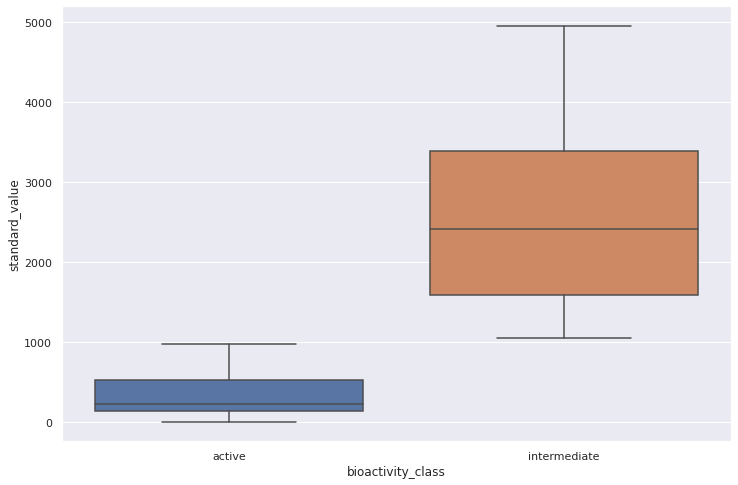

In [174]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bioactivity_class', y='standard_value', data=df)

Active compounds have a small spread while intermediate have a much IQR

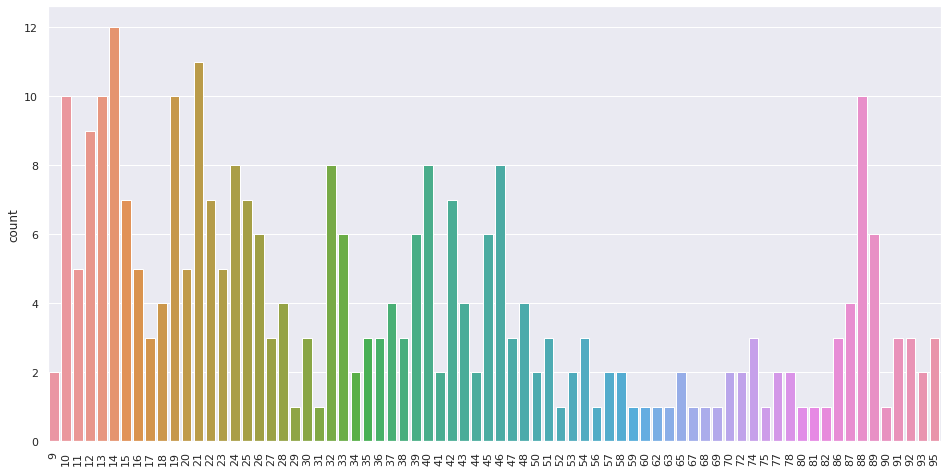

In [175]:
pub_vals = df.filter(like='Pub').sum().sort_values().values
plt.figure(figsize=(16,8))
splot = sns.countplot(x=pub_vals)
splot.tick_params(axis='x', rotation=90)

The Pub values don't seem to have a specific distribution

<AxesSubplot:xlabel='bioactivity_class'>

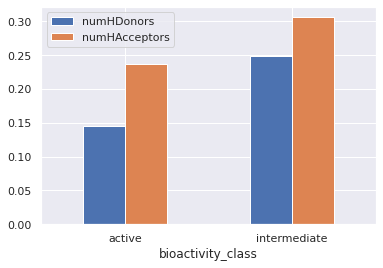

In [176]:
df.groupby('bioactivity_class').agg({'numHDonors': 'mean', 'numHAcceptors': 'mean'}).plot(kind='bar', rot=0)

Active compounds have less numHDonors and numHAcceptors compared to intermediate

Next let's look at which columns are statistically significant with respect to bioactivity_class. One way to test is the [mann whitneyu test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html), conducted below.

The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of of difference in location between distributions.

In [35]:
from scipy.stats import mannwhitneyu

In [36]:
def statistical_significance(x, df, alpha=1e-2):
    
    adf = df[df['bioactivity_class'].eq('active')][x]
    idf = df[df['bioactivity_class'].eq('intermediate')][x]
    stat, pval = mannwhitneyu(adf, idf)
    
    h = 'fail to reject H0' if pval > alpha else 'reject H0'
    results = {'Descriptor':x,
               'Statistics':stat,
               'p':pval,
               'alpha':alpha,
               'Interpretation':h}
    
    return results

In [37]:
pd.concat([pd.DataFrame(statistical_significance(i, df), index=[0]) for i in lipinski_descriptors + ['standard_value']]).sort_values('Interpretation')

,Descriptor,Statistics,p,alpha,Interpretation
0,molwt,976.5,1.200940e-02,0.01,fail to reject H0
0,logP,1170.5,1.634514e-01,0.01,fail to reject H0
0,numHAcceptors,1076.5,5.325991e-02,0.01,fail to reject H0
0,numHDonors,883.5,1.664367e-03,0.01,reject H0
0,standard_value,0.0,1.936102e-18,0.01,reject H0


Taking a look at standard values, the actives and inactives displayed statistically significant difference, which is to be expected since we define the bioactivity threshold with it.

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only numHDonors shows statistically significant difference between actives and inactives.

## Modeling

We will train 2 random forests, one with all the features and another with only significant Lipinski's descriptors

In [38]:
import numpy as np
np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [39]:
df.head()

,molwt,logP,numHDonors,numHAcceptors,bioactivity_class,standard_value,canonical_smiles,PubchemFP1,PubchemFP2,PubchemFP12,...,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,369.368,3.51522,1,4,active,390.0,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,226.351,3.30451,0,5,active,210.0,Cc1c(-c2cnccn2)ssc1=S,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,334.400,3.26220,0,5,active,80.0,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,1,0,1,...,0,0,0,0,1,0,1,0,1,0
3,458.375,2.23320,8,11,intermediate,1580.0,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1,1,1,...,0,1,0,1,0,1,0,1,0,1
4,237.052,2.22770,0,2,active,40.0,O=C1C=Cc2cc(Br)ccc2C1=O,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [165]:
def train_model(X, y, trees):
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = RandomForestClassifier(n_estimators=trees)
    model.fit(X_train, y_train)   
    score = model.score(X_test, y_test)
    return score, X_test, y_test, model

In [166]:
non_features = ['standard_value','bioactivity_class', 'canonical_smiles']

In [167]:
X, y = df.drop(non_features, axis=1), df['bioactivity_class']
print(f'Training X shape {X.shape}')
print(f'Training y shape {y.shape}')

Training X shape (104, 296)
Training y shape (104,)


In [168]:
score, X_test, y_test, model = train_model(X, y, 1000)
print(f'Training score: {score}')

Training score: 0.5238095238095238


In [169]:
y_pred = model.predict(X_test)

In [170]:
eval_df = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
print(classification_report(y_true=eval_df['y_true'], y_pred=eval_df['y_pred']))

              precision    recall  f1-score   support

      active       0.67      0.67      0.67        15
intermediate       0.17      0.17      0.17         6

    accuracy                           0.52        21
   macro avg       0.42      0.42      0.42        21
weighted avg       0.52      0.52      0.52        21



In [51]:
insignificant_cols = ['numHAcceptors', 'logP', 'molwt']
X, y = df.drop(non_features + insignificant_cols, axis=1), df['bioactivity_class']
print(f'Training X shape {X.shape}')
print(f'Training y shape {y.shape}')

Training X shape (104, 293)
Training y shape (104,)


In [52]:
score, X_test, y_test, model = train_model(X, y, 500)
print(f'Training score: {score}')

Training score: 0.5238095238095238


In [53]:
y_pred = model.predict(X_test)

In [54]:
eval_df = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
print(classification_report(y_true=eval_df['y_true'], y_pred=eval_df['y_pred']))

              precision    recall  f1-score   support

      active       0.69      0.60      0.64        15
intermediate       0.25      0.33      0.29         6

    accuracy                           0.52        21
   macro avg       0.47      0.47      0.46        21
weighted avg       0.57      0.52      0.54        21



In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [112]:
df[lipinski_descriptors] = df[lipinski_descriptors].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [134]:
X = torch.Tensor(df.drop(non_features, axis=1).values)
nfeatures = X.shape[1]
y = pd.get_dummies(df['bioactivity_class'])
y = torch.Tensor(y.values)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15)

In [140]:
y_val.shape

torch.Size([16, 2])

In [144]:
def build_model(nfeatures, device='cpu'):
    dense = 32

    model = nn.Sequential(
        nn.Linear(nfeatures, dense),
        nn.ReLU(inplace=True),
        nn.Linear(dense, dense//2),
        nn.ReLU(inplace=True),
        nn.Linear(dense//2, 2),
        nn.Sigmoid()
        ).to(device)
    
    return model

model = build_model(nfeatures)
model

Sequential(
  (0): Linear(in_features=296, out_features=32, bias=True)
  (1): ReLU(inplace=True)
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU(inplace=True)
  (4): Linear(in_features=16, out_features=2, bias=True)
  (5): Sigmoid()
)

In [162]:
def torch_model(model, criterion, optimizer, num_epochs=3, device='cpu'):

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in zip(X_train, y_train):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        for inputs, labels in zip(X_val, y_val):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            pred = torch.argmax(outputs)
        
            running_loss += loss.item() * inputs.size(0)
            running_corrects += (pred == torch.argmax(labels))

        epoch_loss = running_loss / len(X_val)
        epoch_acc = running_corrects.double() / len(X_val)

        print('Epoch: {} loss: {:.4f}, acc: {:.4f}'.format(epoch, epoch_loss, epoch_acc))
    return model

In [163]:
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())
model_trained = torch_model(model, criterion, optimizer, num_epochs=50)

Epoch 1/50
----------
Epoch: 0 loss: 635.2976, acc: 0.5625
Epoch 2/50
----------
Epoch: 1 loss: 663.2454, acc: 0.5625
Epoch 3/50
----------
Epoch: 2 loss: 647.4379, acc: 0.5625
Epoch 4/50
----------
Epoch: 3 loss: 652.7914, acc: 0.5625
Epoch 5/50
----------
Epoch: 4 loss: 658.7648, acc: 0.5625
Epoch 6/50
----------
Epoch: 5 loss: 681.4570, acc: 0.5625
Epoch 7/50
----------
Epoch: 6 loss: 1462.4322, acc: 0.5625
Epoch 8/50
----------
Epoch: 7 loss: 658.0520, acc: 0.5625
Epoch 9/50
----------
Epoch: 8 loss: 691.6519, acc: 0.5625
Epoch 10/50
----------
Epoch: 9 loss: 650.4499, acc: 0.5000
Epoch 11/50
----------
Epoch: 10 loss: 657.0429, acc: 0.5000
Epoch 12/50
----------
Epoch: 11 loss: 1453.1509, acc: 0.5000
Epoch 13/50
----------
Epoch: 12 loss: 1469.5395, acc: 0.5625
Epoch 14/50
----------
Epoch: 13 loss: 1480.2909, acc: 0.5625
Epoch 15/50
----------
Epoch: 14 loss: 1492.9968, acc: 0.5625
Epoch 16/50
----------
Epoch: 15 loss: 1498.7855, acc: 0.5000
Epoch 17/50
----------
Epoch: 16 loss